In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x+5

In [3]:
f(3.0)

20.0

In [4]:
x = np.arange(3.0,10.0,0.25)
y =f(x)
x

array([3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 ,
       5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  , 8.25,
       8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75])

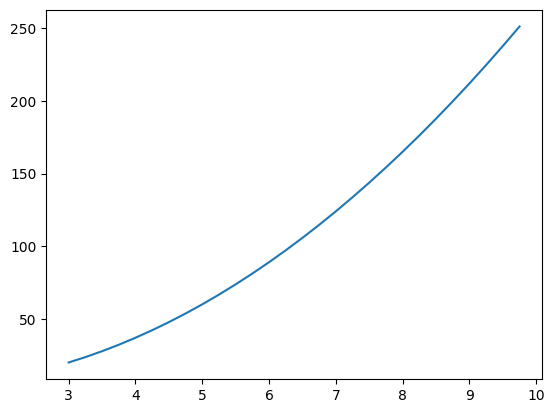

In [5]:
plt.plot(x,y)

In [6]:

#now to find the gradient of the function we will have to understand what is derivative from a root level
#so this is derivative (f(x+h)-f(x))/h we find the rate of chnage of each point insted of finding the rate of change function
h=0.000000001
l  =(f(x+h)-f(x))/h
l

array([14.00000116, 15.49999951, 17.00000496, 18.50000331, 20.00000165,
       21.50000711, 22.99999835, 24.50001091, 25.99999505, 27.5000076 ,
       29.00000595, 30.5000043 , 32.00000265, 33.500001  , 35.00001355,
       36.49999769, 38.00001025, 39.49998018, 41.00002116, 42.50000529,
       43.99998943, 45.49997357, 47.00001455, 48.49999868, 50.00003966,
       51.49996696, 52.99995109, 54.49999207])

In [16]:
# in simple words 
a= 3.0
b=3.4
c=7
h =0.0001
d = a*b+c
# now if we check the rate of change of d w.r.t a then 
a+=h
d_a = a*b+c
d-d_a/h


-171986.19999999998

In [17]:
# and w.r.t b
a= 3.0
b=3.4
c=7
b+= h
d = a*b+c
# now if we check the rate of change of d w.r.t a then 
b+=h
d_b = a*b+c
d-d_b/h

-171988.7997

In [58]:
class value:
    def __init__(self,data,_children=(),_op="",label=""):
        self.data = data
        self._prev = set(_children) 
        self._op = _op
        self.label=label
    def __repr__(self):
        return f"value(data={self.data})"
    def __add__(self,other):
        return value(self.data+other.data,(self,other),"+")
    def __mul__(self,other):
        return value(self.data*other.data,(self,other,"*"))

a = value(10,label="a")
b = value(20,label="b")
c = value(80,label="c")
e=a*b; e.label="e"
d =e+c;d.label="d"
f = value(34,label="f")
L = d*f;L.label="L"
L

value(data=9520)

In [59]:
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                if isinstance(child, value):  # Check if the child is an instance of the value class
                    edges.add((child, v))
                    build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={"rankdir": 'LR'})
    nodes, edges = trace(root)
    
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s| data %.4f}" % (n.label,n.data,), shape="record")
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

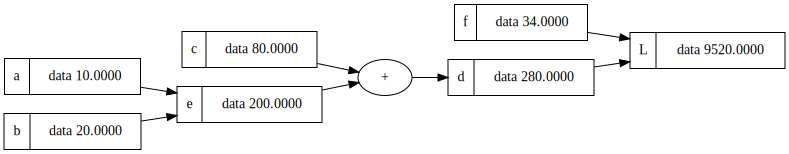

In [60]:
draw_dot(L)